<a href="https://colab.research.google.com/github/lucifernandes/arvoreC4.5/blob/master/ArvoreDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Árvore de Decisão

In [ ]:
import io
import scipy.io
import pandas as pd

from google.colab import files
print("Adicionar arquivo 'wine.csv'")
print(" ")

uploaded1 = files.upload()

##Pré-processamento

In [ ]:
#Dados
base0 = pd.read_csv(io.BytesIO(uploaded1['wine.csv']), names=['classe', 'alcool', 'ac malico', 'cinza', 'alcal da cinza', 'magnesio', 'fenois totais', 'flavonoides', 'fenois n flav', 'proantocianidinas', 'intensidade cor', 'matriz', 'od280/od315', 'prolina'])
#base0 = pd.read_csv('/content/drive/My Drive/Bases/wine.csv', names=['classe', 'alcool', 'ac malico', 'cinza', 'alcal da cinza', 'magnesio', 'fenois totais', 'flavonoides', 'fenois n flav', 'proantocianidinas', 'intensidade cor', 'matriz', 'od280/od315', 'prolina'])

#Escolha dos atributos (foram eles: Álcool, Ácido Málico, Magnésio e Intensidade da cor)
base = base0.loc[0:129,['alcool', 'ac malico', 'magnesio', 'intensidade cor', 'classe']]
base = base.sample(frac=1) #"Embaralhando" as amostras da base
base.reset_index(drop=True,inplace=True) #Resetando os índices
print('------')
print('Base')
print('------')
base.head(130)

##Divisão dos Dados para a Validação K-fold, com K=10 (10 partições)

In [ ]:
#Dados para Teste
teste1 = base.iloc[0:13,:]
teste2 = base.iloc[13:26,:]
teste3 = base.iloc[26:39,:]
teste4 = base.iloc[39:52,:]
teste5 = base.iloc[52:65,:]
teste6 = base.iloc[65:78,:]
teste7 = base.iloc[78:91,:]
teste8 = base.iloc[91:104,:]
teste9 = base.iloc[104:117,:]
teste10 = base.iloc[117:130,:]

#Dados para Treinamento
treino1 = pd.concat([teste2, teste3, teste4, teste5, teste6, teste7, teste8, teste9, teste10], axis=0);treino1.reset_index(drop=True,inplace=True)
treino2 = pd.concat([teste1, teste3, teste4, teste5, teste6, teste7, teste8, teste9, teste10], axis=0);treino2.reset_index(drop=True,inplace=True)
treino3 = pd.concat([teste1, teste2, teste4, teste5, teste6, teste7, teste8, teste9, teste10], axis=0);treino3.reset_index(drop=True,inplace=True)
treino4 = pd.concat([teste1, teste2, teste3, teste5, teste6, teste7, teste8, teste9, teste10], axis=0);treino4.reset_index(drop=True,inplace=True)
treino5 = pd.concat([teste1, teste2, teste3, teste4, teste6, teste7, teste8, teste9, teste10], axis=0);treino5.reset_index(drop=True,inplace=True)
treino6 = pd.concat([teste1, teste2, teste3, teste4, teste5, teste7, teste8, teste9, teste10], axis=0);treino6.reset_index(drop=True,inplace=True)
treino7 = pd.concat([teste1, teste2, teste3, teste4, teste5, teste6, teste8, teste9, teste10], axis=0);treino7.reset_index(drop=True,inplace=True)
treino8 = pd.concat([teste1, teste2, teste3, teste4, teste5, teste6, teste7, teste9, teste10], axis=0);treino8.reset_index(drop=True,inplace=True)
treino9 = pd.concat([teste1, teste2, teste3, teste4, teste5, teste6, teste7, teste8, teste10], axis=0);treino9.reset_index(drop=True,inplace=True)
treino10 = pd.concat([teste1, teste2, teste3, teste4, teste5, teste6, teste7, teste8, teste9], axis=0);treino10.reset_index(drop=True,inplace=True)


##Funções relacionadas a Entropia H

In [ ]:
import math

#Cálculo da Entropia H
#n: total inserido
#n1: total da classe1 dentro de n
#n2: total da classe2 dentro de n
def entropia(n,n1,n2): 
  if n1 == 0:
    p1 = 0
  else:
    p1 = (-1)*(n1/n)*math.log(n1/n,2)
  if n2 == 0:
    p2 = 0
  else:
    p2 = (-1)*(n2/n)*math.log(n2/n,2)
  H = p1+p2
  return H

#Entropia Média
def Hmed(v,nMaior,nMenor,hmaior,hmenor):
  hm = ((nMaior/v)*hmaior) + ((nMenor/v)*hmenor)
  return hm

#Funçaõ que retorna o valor de menor de Entropia H
def melhorH(at1,at2,at3,at4):
  at = [at1,at2,at3,at4]
  v = max(at)
  return v

#Função para a escolha do atributo com menor Entropia
def atrib(atributo1,at): 
  medias = []
  indices = []
  ind = list(atributo1.index)
  for i in range(len(atributo1)):
    nMaior='0';nMaior1='0';nMaior2='0';nMaior3='0';nMenor='0';nMenor1='0';nMenor2='0';nMenor3='0'
    valor1 = int(atributo1.loc[i,[at]])
    for j in range(len(atributo1)):
      valor = int(atributo1.loc[j,[at]])
      #ind = atributo1.index(valor)
      if valor>valor1 : 
        nMaior = nMaior+'1'
        if int(atributo1.loc[ind[j],['classe']].values) == 1:
          nMaior1 = nMaior1 + '1'
        if int(atributo1.loc[ind[j],['classe']].values) == 2:
          nMaior2 = nMaior2+'1'
      else:
        nMenor = nMenor+'1'
        if int(atributo1.loc[ind[j],['classe']].values) == 1:
          nMenor1 = nMenor1+'1'
        if int(atributo1.loc[ind[j],['classe']].values) == 2:
          nMenor2 = nMenor2+'1'
    nMaior=sum(map(int, nMaior));nMaior1=sum(map(int, nMaior1));nMaior2=sum(map(int, nMaior2)) 
    nMenor=sum(map(int, nMenor));nMenor1=sum(map(int, nMenor1));nMenor2=sum(map(int, nMenor2))
    hmaior = entropia(nMaior,nMaior1,nMaior2)
    hmenor = entropia(nMenor,nMenor1,nMenor2)
    hm = Hmed(len(atributo1),nMaior,nMenor,hmaior,hmenor)
    medias.append(hm)
  a = medias.index(min(medias)) 
  b = float(atributo1.loc[a,[at]].values) #Valor do Limiar
  at1 = [min(medias),b,at] 
  return at1 #Retorna os valores referentes a Entropia do limiar escolhido (menor H), Limiar e nome do atributo

##Funções para implementação dos Nós e dos Ramos, seguindo a lógica ilustrada na imagem a baixo

In [ ]:
def PrimeiroNo (treino): #Escolha do primeiro nó
  a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
  a1.reset_index(drop=True,inplace=True)
  a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
  a2.reset_index(drop=True,inplace=True)
  a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
  a3.reset_index(drop=True,inplace=True)
  a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
  a4.reset_index(drop=True,inplace=True)
  x1 = atrib(a1,'alcool')
  x2 = atrib(a2,'ac malico')
  x3 = atrib(a3,'magnesio')
  x4 = atrib(a4,'intensidade cor')
  ats = [x1,x2,x3,x4]
  return ats #Matriz de valores onde cada coluna correspode as informações (Entropia média (menor H), Limiar e nome do atributo) para cada atributo candidato ao Nó 1

#Implementação de um dos ramos
def ramo1(treino,nomeNo,x): 
  r = treino
  coluna=nomeNo
  nlinhas = int(len(r.index))
  for i in range(nlinhas):
    valor = float(r.loc[i,coluna])
    #ind = atributo1.index(valor)
    if valor>x :
      r.loc[i,coluna] = 1
    else:
      r.loc[i,coluna] = 0
  ramo1 = r.loc[r.loc[:,coluna] == 1]
  ramo1 = ramo1.drop(coluna, axis=1)
  ramo1.reset_index(drop=True,inplace=True)
  return ramo1 #Base para decisão do próximo nó

#Implementação do outro ramo, x é o valor do limiar
def ramo2(treino,nomeNo,x): 
  r = treino
  coluna=nomeNo
  nlinhas = int(len(r.index))
  for i in range(nlinhas):
    valor = float(r.loc[i,coluna])
    if valor>x :
      r.loc[i,coluna] = 1
    else:
      r.loc[i,coluna] = 0
  ramo2 = r.loc[r.loc[:,coluna] == 0]
  ramo2 = ramo2.drop(coluna, axis=1)
  ramo2.reset_index(drop=True,inplace=True)
  return ramo2 #Base para decisão do próximo nó

def SegundoNo (treino,nomeNo): #Escolha do segundo Nó, com ramo e nome do Nó como parâmetros de entrada
  if nomeNo == 'alcool':
    a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
    a2.reset_index(drop=True,inplace=True)
    a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
    a3.reset_index(drop=True,inplace=True)
    a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
    a4.reset_index(drop=True,inplace=True)
    x2 = atrib(a2,'ac malico')
    x3 = atrib(a3,'magnesio')
    x4 = atrib(a4,'intensidade cor')
    ats = [x2,x3,x4]
  elif nomeNo == 'ac malico':
    a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
    a1.reset_index(drop=True,inplace=True)
    a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
    a3.reset_index(drop=True,inplace=True)
    a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
    a4.reset_index(drop=True,inplace=True)
    x1 = atrib(a1,'alcool')
    x3 = atrib(a3,'magnesio')
    x4 = atrib(a4,'intensidade cor')
    ats = [x1,x3,x4]
  elif nomeNo == 'magnesio':
    a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
    a1.reset_index(drop=True,inplace=True)
    a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
    a2.reset_index(drop=True,inplace=True)
    a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
    a4.reset_index(drop=True,inplace=True)
    x1 = atrib(a1,'alcool')
    x2 = atrib(a2,'ac malico')
    x4 = atrib(a4,'intensidade cor')
    ats = [x1,x2,x4]
  elif nomeNo == 'intensidade cor':
    a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
    a1.reset_index(drop=True,inplace=True)
    a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
    a2.reset_index(drop=True,inplace=True)
    a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
    a3.reset_index(drop=True,inplace=True)
    x1 = atrib(a1,'alcool')
    x2 = atrib(a2,'ac malico')
    x3 = atrib(a3,'magnesio')
    ats = [x1,x2,x3]
  else:
    print('deu errado')
  return ats #Matriz de valores onde cada coluna correspode as informações (Entropia média (menor H), Limiar e nome do atributo) para cada atributo candidato aos Nós 2

def TerceiroNo (treino,nomeNo,nomeNo2): #Escolha do Terceiro Nó, com ramo, nome do Nó 1 e nome de um Nó 2 como parâmetros de entrada
  if nomeNo == 'alcool':
    if nomeNo2 == 'ac malico':
      a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
      a3.reset_index(drop=True,inplace=True)
      a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
      a4.reset_index(drop=True,inplace=True)
      x3 = atrib(a3,'magnesio')
      x4 = atrib(a4,'intensidade cor')
      ats = [x3,x4]
    if nomeNo2 == 'magnesio':
      a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
      a2.reset_index(drop=True,inplace=True)
      a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
      a4.reset_index(drop=True,inplace=True)
      x2 = atrib(a2,'ac malico')
      x4 = atrib(a4,'intensidade cor')
      ats = [x2,x4]
    if nomeNo2 == 'intensidade cor':
      a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
      a2.reset_index(drop=True,inplace=True)
      a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
      a3.reset_index(drop=True,inplace=True)
      x2 = atrib(a2,'ac malico')
      x3 = atrib(a3,'magnesio')
      ats = [x2,x3]
  if nomeNo == 'ac malico':
    if nomeNo2 == 'alcool':
      a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
      a3.reset_index(drop=True,inplace=True)
      a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
      a4.reset_index(drop=True,inplace=True)
      x3 = atrib(a3,'magnesio')
      x4 = atrib(a4,'intensidade cor')
      ats = [x3,x4]
    if nomeNo2 == 'magnesio':
      a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
      a1.reset_index(drop=True,inplace=True)
      a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
      a4.reset_index(drop=True,inplace=True)
      x1 = atrib(a1,'alcool')
      x4 = atrib(a4,'intensidade cor')
      ats = [x1,x4]
    if nomeNo2 == 'intensidade cor':
      a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
      a1.reset_index(drop=True,inplace=True)
      a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
      a3.reset_index(drop=True,inplace=True)
      x1 = atrib(a1,'alcool')
      x3 = atrib(a3,'magnesio')
      ats = [x1,x3]
  if nomeNo == 'magnesio':
    if nomeNo2 == 'alcool':
      a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
      a2.reset_index(drop=True,inplace=True)
      a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
      a4.reset_index(drop=True,inplace=True)
      x2 = atrib(a2,'ac malico')
      x4 = atrib(a4,'intensidade cor')
      ats = [x2,x4]
    if nomeNo2 == 'ac malico':
      a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
      a1.reset_index(drop=True,inplace=True)
      a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
      a4.reset_index(drop=True,inplace=True)
      x1 = atrib(a1,'alcool')
      x4 = atrib(a4,'intensidade cor')
      ats = [x1,x4]
    if nomeNo2 == 'intensidade cor':
      a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
      a1.reset_index(drop=True,inplace=True)
      a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
      a2.reset_index(drop=True,inplace=True)
      x1 = atrib(a1,'alcool')
      x2 = atrib(a2,'ac malico')
      ats = [x1,x2]
  if nomeNo == 'intensidade cor':
    if nomeNo2 == 'alcool':
      a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
      a2.reset_index(drop=True,inplace=True)
      a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
      a3.reset_index(drop=True,inplace=True)
      x2 = atrib(a2,'ac malico')
      x3 = atrib(a3,'magnesio')
      ats = [x2,x3]
    if nomeNo2 == 'ac malico':
      a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
      a1.reset_index(drop=True,inplace=True)
      a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
      a3.reset_index(drop=True,inplace=True)
      x1 = atrib(a1,'alcool')
      x3 = atrib(a3,'magnesio')
      ats = [x1,x3]
    if nomeNo2 == 'magnesio':
      a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
      a1.reset_index(drop=True,inplace=True)
      a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
      a2.reset_index(drop=True,inplace=True)
      x1 = atrib(a1,'alcool')
      x2 = atrib(a2,'ac malico')
      ats = [x1,x2]
  return ats #Matriz de valores onde cada coluna correspode as informações (Entropia média (menor H), Limiar e nome do atributo) para cada atributo candidato aos Nós 3

#Escolha do Quarto Nó, com ramo, nome do Nó 1, nome de um Nó 2 e nome de um Nó 3 como parâmetros de entrada
def QuartoNo (treino,nomeNo,nomeNo2,nomeNo3): 
  if nomeNo == 'alcool':
    if nomeNo2 == 'ac malico':
      if nomeNo3 == 'magnesio':
        a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
        a4.reset_index(drop=True,inplace=True)
        x4 = atrib(a4,'intensidade cor')
        ats = [x4]
      if nomeNo3 == 'intensidade cor':
        a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
        a3.reset_index(drop=True,inplace=True)
        x3 = atrib(a3,'magnesio')
        ats = [x3]
    if nomeNo2 == 'magnesio':
      if nomeNo3 == 'ac malico':
        a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
        a4.reset_index(drop=True,inplace=True)
        x4 = atrib(a4,'intensidade cor')
        ats = [x4]
      if nomeNo3 == 'intensidade cor':
        a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
        a2.reset_index(drop=True,inplace=True)
        x2 = atrib(a2,'ac malico')
        ats = [x2]
    if nomeNo2 == 'intensidade cor':
      if nomeNo3 == 'ac malico':
        a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
        a3.reset_index(drop=True,inplace=True)
        x3 = atrib(a3,'magnesio')
        ats = [x3]
      if nomeNo3 == 'magnesio':
        a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
        a2.reset_index(drop=True,inplace=True)
        x2 = atrib(a2,'ac malico')
        ats = [x2]
  if nomeNo == 'ac malico':
    if nomeNo2 == 'alcool':
      if nomeNo3 == 'magnesio':
        a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
        a4.reset_index(drop=True,inplace=True)
        x4 = atrib(a4,'intensidade cor')
        ats = [x4]
      if nomeNo3 == 'intensidade cor':
        a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
        a3.reset_index(drop=True,inplace=True)
        x3 = atrib(a3,'magnesio')
        ats = [x3]
    if nomeNo2 == 'magnesio':
      if nomeNo3 == 'alcool':
        a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
        a4.reset_index(drop=True,inplace=True)
        x4 = atrib(a4,'intensidade cor')
        ats = [x4]
      if nomeNo3 == 'intensidade cor':
        a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
        a1.reset_index(drop=True,inplace=True)
        x1 = atrib(a1,'alcool')
        ats = [x1]
    if nomeNo2 == 'intensidade cor':
      if nomeNo3 == 'alcool':
        a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
        a3.reset_index(drop=True,inplace=True)
        x3 = atrib(a3,'magnesio')
        ats = [x3]
      if nomeNo3 == 'magnesio':
        a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
        a1.reset_index(drop=True,inplace=True)
        x1 = atrib(a1,'alcool')
        ats = [x1]
  if nomeNo == 'magnesio':
    if nomeNo2 == 'alcool':
      if nomeNo3 == 'ac malico':
        a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
        a4.reset_index(drop=True,inplace=True)
        x4 = atrib(a4,'intensidade cor')
        ats = [x4]
      if nomeNo3 == 'intensidade cor':
        a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
        a2.reset_index(drop=True,inplace=True)
        x2 = atrib(a2,'ac malico')
        ats = [x2]
    if nomeNo2 == 'ac malico':
      if nomeNo3 == 'alcool':
        a4 = treino.loc[:, ['intensidade cor', 'classe']].sort_values(by='intensidade cor')
        a4.reset_index(drop=True,inplace=True)
        x4 = atrib(a4,'intensidade cor')
        ats = [x4]
      if nomeNo3 == 'intensidade cor':
        a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
        a1.reset_index(drop=True,inplace=True)
        x1 = atrib(a1,'alcool')
        ats = [x1]
    if nomeNo2 == 'intensidade cor':
      if nomeNo3 == 'alcool':
        a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
        a2.reset_index(drop=True,inplace=True)
        x2 = atrib(a2,'ac malico')
        ats = [x2]
      if nomeNo3 == 'ac malico':
        a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
        a1.reset_index(drop=True,inplace=True)
        x1 = atrib(a1,'alcool')
        ats = [x1]
  if nomeNo == 'intensidade cor':
    if nomeNo2 == 'alcool':
      if nomeNo3 == 'ac malico':
        a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
        a3.reset_index(drop=True,inplace=True)
        x3 = atrib(a3,'magnesio')
        ats = [x3]
      if nomeNo3 == 'magnesio':
        a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
        a2.reset_index(drop=True,inplace=True)
        x2 = atrib(a2,'ac malico')
        ats = [x2]
    if nomeNo2 == 'ac malico':
      if nomeNo3 == 'alcool':
        a3 = treino.loc[:, ['magnesio', 'classe']].sort_values(by='magnesio')
        a3.reset_index(drop=True,inplace=True)
        x3 = atrib(a3,'magnesio')
        ats = [x3]
      if nomeNo3 == 'magnesio':
        a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
        a1.reset_index(drop=True,inplace=True)
        x1 = atrib(a1,'alcool')
        ats = [x1]
    if nomeNo2 == 'magnesio':
      if nomeNo3 == 'alcool':
        a2 = treino.loc[:, ['ac malico', 'classe']].sort_values(by='ac malico')
        a2.reset_index(drop=True,inplace=True)
        x2 = atrib(a2,'ac malico')
        ats = [x2]
      if nomeNo3 == 'ac malico':
        a1 = treino.loc[:, ['alcool', 'classe']].sort_values(by='alcool')
        a1.reset_index(drop=True,inplace=True)
        x1 = atrib(a1,'alcool')
        ats = [x1]
  return ats #Matriz de valores onde cada coluna correspode as informações (Entropia média (menor H), Limiar e nome do atributo) para cada atributo candidato aos Nós 4

#Retorna a classe da folha
def classe(ramo):
  v1 = int(ramo.loc[ramo.loc[:,'classe'] == 1].count())
  v2 = int(ramo.loc[ramo.loc[:,'classe'] == 2].count())
  if v1>v2:
    c = 1
  else:
    c = 2
  return c


##A árvore será implementada a partir da lógica ilustrada na imagem a seguir

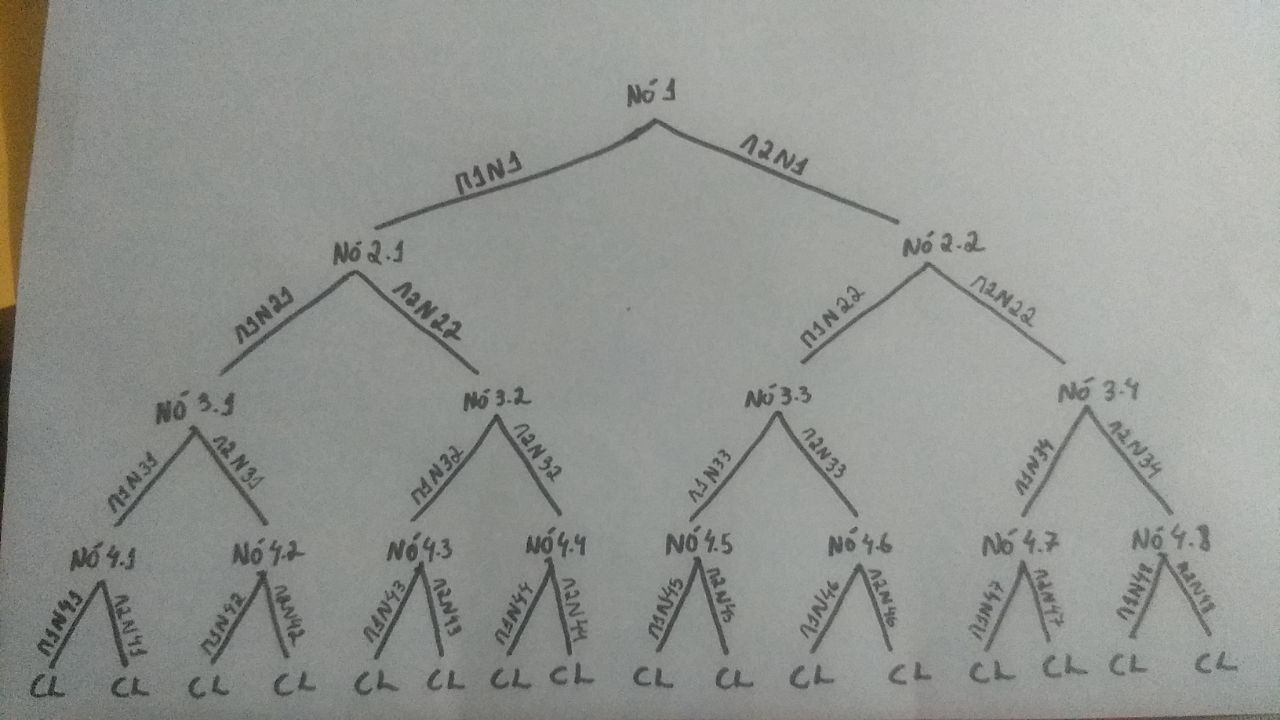

##Classificador

In [ ]:
def classificador (base,classif):
  x=classif[0];x21=classif[1];x22=classif[3];x31=classif[4];x32=classif[5];x33=classif[6];
  x34=classif[7];x41=classif[8];x42=classif[9];x43=classif[10];x44=classif[11];x45=classif[12];
  x46=classif[13];x47=classif[14];nomeNo=classif[15];nomeNo21=classif[16];nomeNo22=classif[17];
  nomeNo31=classif[18];nomeNo32=classif[19];nomeNo33=classif[20];nomeNo34=classif[21];
  nomeNo41=classif[22];nomeNo42=classif[23];nomeNo43=classif[24];nomeNo44=classif[25];
  nomeNo45=classif[26];nomeNo46=classif[27];nomeNo47=classif[28];classer1n41=classif[29];
  classer2n41=classif[30];classer1n42=classif[31];classer2n42=classif[32];classer1n43=classif[33];
  classer2n43=classif[34];classer1n44=classif[35];classer2n44=classif[36];classer1n45=classif[37];
  classer2n45=classif[38];classer1n46=classif[39];classer2n46=classif[40];classer1n47=classif[41];
  classer2n47=classif[42];classer1n48=classif[43];classer2n48=classif[44];
  cl = []
  for i in range(len(base)):
    if base.loc[i,nomeNo] > limiar:
      if base.loc[i,nomeNo21] > limiar21:
        if base.loc[i,nomeNo31] > limiar31:
          if base.loc[i,nomeNo41] > limiar41:
            cl.append(classe1n41)
          else:
            cl.append(classe2n41)
        else :
          if base.loc[i,nomeNo42] > limiar42:
            cl.append(classe1n42)
          else:
            cl.append(classe2n42)
      else:
        if base.loc[i,nomeNo32] > limiar32:
          if base.loc[i,nomeNo43] > limiar43:
            cl.append(classe1n43)
          else:
            cl.append(classe2n43)
        else:
          if base.loc[i,nomeNo44] > limiar44:
            cl.append(classe1n44)
          else:
            cl.append(classe2n44)
    else:
      if base.loc[i,nomeNo22] > limiar22:
        if  base.loc[i,nomeNo33] > limiar33:
          if  base.loc[i,nomeNo45] > limiar45:
            cl.append(classe1n45)
          else:
            cl.append(classe2n45)
        else:
          if base.loc[i,nomeNo46] > limiar46:
            cl.append(classe1n46)
          else:
            cl.append(classe2n46)
      else:
        if base.loc[i,nomeNo34] > limiar34:
          if  base.loc[i,nomeNo47] > limiar47:
            cl.append(classe1n47)
          else:
            cl.append(classe2n47)
        else:
          if base.loc[i,nomeNo48] > limiar48:
            cl.append(classe1n48)
          else:
            cl.append(classe2n48)
  return cl

#Acurácia
def acuracia (base,cl):
  acertos = 0
  for i in range(len(cl)):
    if int(base.loc[i,'classe']) == cl[i]:
      acertos = acertos + 1
  ac = acertos/len(cl)
  return ac 

##Treinamento e Validação

###Função para Treinamento

In [ ]:
def treinamento(treino):
  #Nó 1
  ats1 = PrimeiroNo(treino) #Retorna os valores de H, na primeira linha, e limiar, na segunda, e nome do atributos respectivos
  a1=ats1[0];a2=ats1[1];a3=ats1[2];a4=ats1[3]
  vH = [a1[0],a2[0],a3[0],a4[0]] #Valores de H
  limiares = [a1[1],a2[1],a3[1],a4[1]] #Valores dos limiares
  n = int(vH.index(min(vH)))
  nomesAtributo = [a1[2],a2[2],a3[2],a4[2]]
  nomeNo = nomesAtributo[n] #Nome do Nó
  x = limiares[n] #Limiar para ramificação
  r1n1 = ramo1(treino,nomeNo,x) #Primeiro ramo do primeiro nó
  r2n1 = ramo2(treino,nomeNo,x) #Segundo ramo do primeiro nó
  print('Atributo do Nó 1: ', nomeNo)

  #Os demais Nós seguem o mesmo padrão

  #Nó 2.1
  ats21 = SegundoNo(r1n1,nomeNo)
  a1=ats21[0];a2=ats21[1];a3=ats21[2]
  vH21 = [a1[0],a2[0],a3[0]]
  limiares21 = [a1[1],a2[1],a3[1]]
  n21 = int(vH21.index(min(vH21)))
  nomesAtributo21 = [a1[2],a2[2],a3[2]]
  nomeNo21 = nomesAtributo21[n21]
  x21 = limiares21[n21]
  r1n21 = ramo1(r1n1,nomeNo21,x21) 
  r2n21 = ramo2(r1n1,nomeNo21,x21)
  print('Atributo do Nó 2.1: ', nomeNo21)
  #Nó 2.2
  ats22 = SegundoNo(r2n1,nomeNo)
  a1=ats22[0];a2=ats22[1];a3=ats22[2]
  vH22 = [a1[0],a2[0],a3[0]]
  limiares22 = [a1[1],a2[1],a3[1]]
  n22 = int(vH22.index(min(vH22)))
  nomesAtributo22 = [a1[2],a2[2],a3[2]]
  nomeNo22 = nomesAtributo22[n22]
  x22 = limiares22[n22] 
  r1n22 = ramo1(r2n1,nomeNo22,x22) 
  r2n22 = ramo2(r2n1,nomeNo22,x22) 
  print('Atributo do Nó 2.2: ', nomeNo22)
  #Nó 3.1
  ats31 = TerceiroNo(r1n21,nomeNo,nomeNo21)
  a1=ats31[0];a2=ats31[1]
  vH31 = [a1[0],a2[0]]
  limiares31 = [a1[1],a2[1]]
  n31 = int(vH31.index(min(vH31)))
  nomesAtributo31 = [a1[2],a2[2]]
  nomeNo31 = nomesAtributo31[n31]
  x31 = limiares31[n31]
  r1n31 = ramo1(r1n21,nomeNo31,x31)
  r2n31 = ramo2(r1n21,nomeNo31,x31)
  print('Atributo do Nó 3.1: ', nomeNo31)
  #Nó 3.2
  ats32 = TerceiroNo(r1n21,nomeNo,nomeNo21)
  a1=ats31[0];a2=ats31[1]
  vH32 = [a1[0],a2[0]]
  limiares32 = [a1[1],a2[1]]
  n32 = int(vH32.index(min(vH32)))
  nomesAtributo32 = [a1[2],a2[2]]
  nomeNo32 = nomesAtributo32[n32]
  x32 = limiares32[n32] 
  r1n32 = ramo1(r2n21,nomeNo32,x32) 
  r2n32 = ramo2(r2n21,nomeNo32,x32) 
  print('Atributo do Nó 3.2: ', nomeNo32)
  #Nó 3.3
  ats33 = TerceiroNo(r1n22,nomeNo,nomeNo22)
  a1=ats33[0];a2=ats33[1]
  vH33 = [a1[0],a2[0]]
  limiares33 = [a1[1],a2[1]]
  n33 = int(vH33.index(min(vH33)))
  nomesAtributo33 = [a1[2],a2[2]]
  nomeNo33 = nomesAtributo33[n33]
  x33 = limiares33[n33] 
  r1n33 = ramo1(r1n22,nomeNo33,x33) 
  r2n33 = ramo2(r1n22,nomeNo33,x33) 
  print('Atributo do Nó 3.3: ', nomeNo33)
  #Nó 3.4
  ats34 = TerceiroNo(r1n22,nomeNo,nomeNo22)
  a1=ats34[0];a2=ats34[1]
  vH34 = [a1[0],a2[0]]
  limiares34 = [a1[1],a2[1]]
  n34 = int(vH34.index(min(vH34)))
  nomesAtributo34 = [a1[2],a2[2]]
  nomeNo34 = nomesAtributo34[n34]
  x34 = limiares34[n34] 
  r1n34 = ramo1(r2n22,nomeNo34,x34,) 
  r2n34 = ramo2(r2n22,nomeNo34,x34) 
  print('Atributo do Nó 3.4: ', nomeNo34)
  #Nó 4.1
  ats41 = QuartoNo(r1n31,nomeNo,nomeNo21,nomeNo31)
  a1=ats41[0]
  vH41 = [a1[0]]
  limiares41 = [a1[1]]
  n41 = int(vH41.index(min(vH41)))
  nomesAtributo41 = [a1[2]]
  nomeNo41 = nomesAtributo41[n41]
  x41 = limiares41[n41] 
  r1n41 = ramo1(r1n31,nomeNo41,x41) 
  classer1n41 = classe(r1n41)
  r2n41 = ramo2(r1n31,nomeNo41,x41) 
  classer2n41 = classe(r2n41)
  print('Atributo do Nó 4.1: ', nomeNo41)
  print('Ramo 1 : ', classer1n41)
  print('Ramo 2 : ', classer2n41)
  #Nó 4.2
  ats42 = QuartoNo(r2n31,nomeNo,nomeNo21,nomeNo31)
  a1=ats42[0]
  vH42 = [a1[0]]
  limiares42 = [a1[1]]
  n42 = int(vH42.index(min(vH42)))
  nomesAtributo42 = [a1[2]]
  nomeNo42 = nomesAtributo42[n41]
  x42 = limiares41[n42]
  r1n42 = ramo1(r2n31,nomeNo42,x42)
  classer1n42 = classe(r1n42)
  r2n42 = ramo2(r2n31,nomeNo42,x42)
  classer2n42 = classe(r2n42)
  print('Atributo do Nó 4.2: ', nomeNo42)
  print('Ramo 3 : ', classer1n42)
  print('Ramo 4 : ', classer2n42)
  #Nó 4.3
  ats43 = QuartoNo(r1n32,nomeNo,nomeNo21,nomeNo32)
  a1=ats43[0]
  vH43 = [a1[0]]
  limiares43 = [a1[1]]
  n43 = int(vH43.index(min(vH43)))
  nomesAtributo43 = [a1[2]]
  nomeNo43 = nomesAtributo43[n43]
  x43 = limiares43[n43]
  r1n43 = ramo1(r1n32,nomeNo43,x43)
  classer1n43 = classe(r1n43)
  r2n43 = ramo2(r2n31,nomeNo43,x43) 
  classer2n43 = classe(r2n43)
  print('Atributo do Nó 4.3: ', nomeNo43)
  print('Ramo 5 : ', classer1n43)
  print('Ramo 6 : ', classer2n43)
  #Nó 4.4
  ats44 = QuartoNo(r2n32,nomeNo,nomeNo21,nomeNo32)
  a1=ats44[0]
  vH44 = [a1[0]]
  limiares44 = [a1[1]]
  n44 = int(vH44.index(min(vH44)))
  nomesAtributo44 = [a1[2]]
  nomeNo44 = nomesAtributo44[n44]
  x44 = limiares44[n44] 
  r1n44 = ramo1(r2n32,nomeNo44,x44) 
  classer1n44 = classe(r1n44)
  r2n44 = ramo2(r2n32,nomeNo44,x44) 
  classer2n44 = classe(r2n44)
  print('Atributo do Nó 4.4: ', nomeNo44)
  print('Ramo 7 : ', classer1n44)
  print('Ramo 8 : ', classer2n44)
  #Nó 4.5
  ats45 = QuartoNo(r1n33,nomeNo,nomeNo22,nomeNo33)
  a1=ats45[0]
  vH45 = [a1[0]]
  limiares45 = [a1[1]]
  n45 = int(vH45.index(min(vH45)))
  nomesAtributo45 = [a1[2]]
  nomeNo45 = nomesAtributo45[n45]
  x45 = limiares45[n45]
  r1n45 = ramo1(r1n33,nomeNo45,x45) 
  classer1n45 = classe(r1n45)
  r2n45 = ramo2(r1n33,nomeNo45,x45) 
  classer2n45 = classe(r2n45)
  print('Atributo do Nó 4.5: ', nomeNo45)
  print('Ramo 9 : ', classer1n45)
  print('Ramo 10 : ', classer2n45)
  #Nó 4.6
  ats46 = QuartoNo(r2n33,nomeNo,nomeNo22,nomeNo33)
  a1=ats46[0]
  vH46 = [a1[0]]
  limiares46 = [a1[1]]
  n46 = int(vH46.index(min(vH46)))
  nomesAtributo46 = [a1[2]]
  nomeNo46 = nomesAtributo46[n46]
  x46 = limiares46[n46]
  r1n46 = ramo1(r2n33,nomeNo46,x46)
  classer1n46 = classe(r1n46)
  r2n46 = ramo2(r2n33,nomeNo46,x46)
  classer2n46 = classe(r2n46)
  print('Atributo do Nó 4.6: ', nomeNo46)
  print('Ramo 11 : ', classer1n46)
  print('Ramo 12 : ', classer2n46)
  #Nó 4.7
  ats47 = QuartoNo(r1n34,nomeNo,nomeNo22,nomeNo34)
  a1=ats47[0]
  vH47 = [a1[0]]
  limiares47 = [a1[1]]
  n47 = int(vH47.index(min(vH47)))
  nomesAtributo47 = [a1[2]]
  nomeNo47 = nomesAtributo47[n47]
  x47 = limiares47[n47]
  r1n47 = ramo1(r1n34,nomeNo47,x47)
  classer1n47 = classe(r1n47)
  r2n47 = ramo2(r1n34,nomeNo47,x47)
  classer2n47 = classe(r2n47)
  print('Atributo do Nó 4.7: ', nomeNo47)
  print('Ramo 13 : ', classer1n47)
  print('Ramo 14 : ', classer2n47)
  #Nó 4.8
  ats48 = QuartoNo(r2n34,nomeNo,nomeNo22,nomeNo34)
  a1=ats48[0]
  vH48 = [a1[0]]
  limiares48 = [a1[1]]
  n48 = int(vH48.index(min(vH48)))
  nomesAtributo48 = [a1[2]]
  nomeNo48 = nomesAtributo48[n48]
  x48 = limiares47[n48] 
  r1n48 = ramo1(r2n34,nomeNo48,x48)
  classer1n48 = classe(r1n48)
  r2n48 = ramo2(r2n34,nomeNo48,x48)
  classer2n48 = classe(r2n48)
  print('Atributo do Nó 4.8: ', nomeNo48)
  print('Ramo 15 : ', classer1n48)
  print('Ramo 16 : ', classer2n48)
  classif = [x,x21,x22,x31,x32,x33,x34,x41,x42,x43,x44,x45,x46,x47,x48
                   nomeNo,nomeNo21,nomeNo22,nomeNo31,nomeNo32,nomeNo33,nomeNo34,nomeNo41,
                   nomeNo42,nomeNo43,nomeNo44,nomeNo45,nomeNo46,nomeNo47,nomeNo48
                   classer1n41,classer2n41,classer1n42,classer2n42,classer1n43,classer2n43,
                    classer1n44,classer2n44,classer1n45,classer2n45,classer1n46,classer2n46,
                    classer1n47,classer2n47,classer1n48,classer2n48]
  return classif


###Partição **1**

In [ ]:
classif1 = treinamento(treino1)
cl1 = classificador(teste1,classif1)
acuracia1 = acuracia(treino1,cl1)
print('Acurácia Partição 1: ', acuracia1)

###Partição 2

In [ ]:
classif2 = treinamento(treino2)
cl2 = classificador(teste2,classif2)
acuracia2 = acuracia(treino2,cl2)
print('Acurácia Partição 2: ', acuracia2)

###Partição 3

In [ ]:
classif3 = treinamento(treino3)
cl3 = classificador(teste3,classif3)
acuracia3 = acuracia(treino3,cl3)
print('Acurácia Partição 3: ', acuracia3)

###Partição 4

In [ ]:
classif4 = treinamento(treino4)
cl4 = classificador(teste4,classif4)
acuracia4 = acuracia(treino4,cl4)
print('Acurácia Partição 4: ', acuracia4)

###Partição 5

In [ ]:
classif5 = treinamento(treino5)
cl5 = classificador(teste5,classif5)
acuracia5 = acuracia(treino5,cl5)
print('Acurácia Partição 5: ', acuracia5)

###Partição 6

In [ ]:
classif6 = treinamento(treino6)
cl6 = classificador(teste6,classif6)
acuracia6 = acuracia(treino6,cl6)
print('Acurácia Partição 6: ', acuracia6)

###Partição 7

In [ ]:
classif7 = treinamento(treino7)
cl7 = classificador(teste7,classif7)
acuracia7 = acuracia(treino7,cl7)
print('Acurácia Partição 7: ', acuracia7)

###Partição 8

In [ ]:
classif8 = treinamento(treino8)
cl8 = classificador(teste8,classif8)
acuracia8 = acuracia(treino8,cl8)
print('Acurácia Partição 8: ', acuracia8)

###Partição 9

In [ ]:
classif9 = treinamento(treino9)
cl9 = classificador(teste9,classif9)
acuracia9 = acuracia(treino9,cl9)
print('Acurácia Partição 9: ', acuracia9)

###Partição 10

In [ ]:
classif10 = treinamento(treino10)
cl10 = classificador(teste10,classif10)
acuracia10 = acuracia(treino10,cl10)
print('Acurácia Partição 10: ', acuracia10)

#Acurácia média  do algoritmo

In [ ]:
acMedia = mean(acuracia1,acuracia2,acuracia3,acuracia4,acuracia5,acuracia6,acuracia7,acuracia8,acuracia9,acuracia10)
print(acMedia)